In [0]:
import pandas as pd
myData = pd.read_csv('sample_data/california_housing_test.csv')

In [6]:
myData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


In [7]:
myData.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [0]:
myDataSubset = myData.loc[:, ['housing_median_age', 'total_rooms', 'households']]

In [18]:
myDataSubset.head()

,housing_median_age,total_rooms,households
0,27.0,3885.0,606.0
1,43.0,1510.0,277.0
2,27.0,3589.0,495.0
3,28.0,67.0,11.0
4,19.0,1241.0,237.0


In [0]:
myDataSubset['NoRoomsPerHSHLD'] = myDataSubset['total_rooms']/myDataSubset['households']

In [20]:
myDataSubset.head()


,housing_median_age,total_rooms,households,NoRoomsPerHSHLD
0,27.0,3885.0,606.0,6.410891
1,43.0,1510.0,277.0,5.451264
2,27.0,3589.0,495.0,7.250505
3,28.0,67.0,11.0,6.090909
4,19.0,1241.0,237.0,5.236287


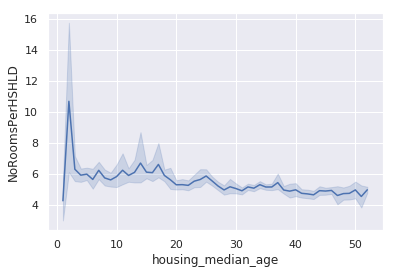

In [21]:
import seaborn as sns; sns.set()
ax = sns.lineplot(x="housing_median_age", y="NoRoomsPerHSHLD", data=myDataSubset)

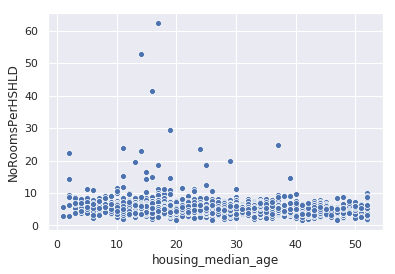

In [22]:
ax = sns.scatterplot(x="housing_median_age", y="NoRoomsPerHSHLD", data=myDataSubset)

In [0]:
myDataSubset2 = myDataSubset[myDataSubset['housing_median_age']>18]

from sklearn.linear_model import LinearRegression

# Build linear regression model using TV and Radio as predictors
# Split data into predictors X and output Y
predictors = ['housing_median_age']
X = myDataSubset2[predictors]
y = myDataSubset2['NoRoomsPerHSHLD']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [33]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 5.929045282220948
betas = [-0.02261562]


In [34]:
model.predict(X)

array([5.31842357, 4.95657366, 5.31842357, ..., 5.31842357, 5.02442052,
       4.97918928])

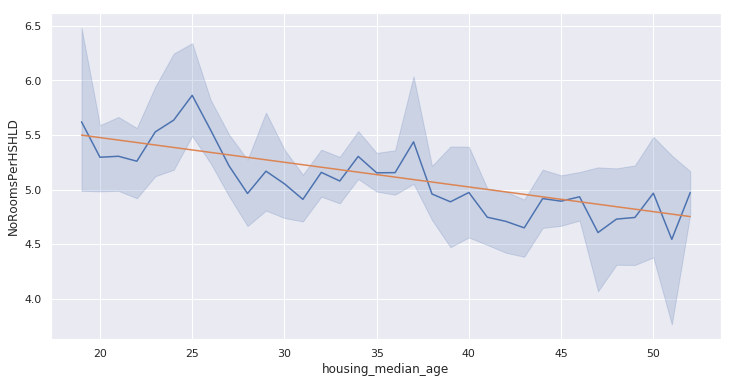

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot regression against actual data
plt.figure(figsize=(12, 6))

import seaborn as sns; sns.set()

# Predict values
RoomsPrediction = model.predict(X)


ax = sns.lineplot(x="housing_median_age", y="NoRoomsPerHSHLD", data=myDataSubset2)
sns.lineplot(x=myDataSubset2['housing_median_age'], y=RoomsPrediction, ax=ax,err_style=None )